# Pêndulo Duplo Simples - Kane

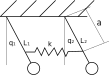

In [1]:
from IPython.core.display import SVG
SVG(filename='pendulo-duplo-simples2.svg')

In [2]:
import sympy.physics.mechanics as me
import sympy as sy

In [3]:
q1,q2 = me.dynamicsymbols('q1 q2')
q1d, q2d = me.dynamicsymbols('q1 q2',1)
u1, u2 = me.dynamicsymbols('u1 u2')
u1d, u2d = me.dynamicsymbols('u1 u2', 1)

In [4]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [5]:
A.orient(N,'Axis',[q1,N.z])
A.set_ang_vel(N,u1*A.z)
A.dcm(N)

Matrix([
[ cos(q1(t)), sin(q1(t)), 0],
[-sin(q1(t)), cos(q1(t)), 0],
[          0,          0, 1]])

In [6]:
B.orient(N,'Axis',[q2,N.z])
B.set_ang_vel(N,u2*B.z)
B.dcm(N)

Matrix([
[ cos(q2(t)), sin(q2(t)), 0],
[-sin(q2(t)), cos(q2(t)), 0],
[          0,          0, 1]])

In [7]:
O = me.Point('O')
O.set_vel(N,0)

In [8]:
m1,m2,L1,L2,g,k,a = sy.symbols('m1 m2 L1 L2 g k a')

In [9]:
P1 = me.Point('P1')
p_P1_O = -L1*A.y
P1.set_pos(O,p_P1_O)
P1.set_vel(N,p_P1_O.dt(N))
P1.vel(N)

L1*u1*A.x

In [10]:
P1.acc(N)

L1*u1'*A.x + L1*u1**2*A.y

In [11]:
P2 = me.Point('P2')
p_P2_P1 = -L2*B.y
p_P2_O = L1*N.x + p_P2_P1
P2.set_pos(P1,p_P2_P1)
P2.set_vel(N,p_P2_O.dt(N))
P2.vel(N)

L2*u2*B.x

In [12]:
P2.acc(N)

L2*u2'*B.x + L2*u2**2*B.y

In [13]:
Par1 = me.Particle('Par1',P1,m1)

In [14]:
Par2 = me.Particle('Par2',P2,m2)

In [15]:
T1, T2 = sy.symbols('T1 T2')

In [16]:
R1 = -m1*g*N.y + T1*A.y + k*a*(q1-q2)*N.x

In [17]:
R2 = -m2*g*N.y + T2*B.y - k*a*(q1-q2)*N.x

In [18]:
kd = [q1d-u1,q2d-u2]

In [19]:
Fl = [(P1,R1),(P2,R2)]

In [20]:
Bl = [Par1,Par2]

In [21]:
KM = me.KanesMethod(N,q_ind=[q1,q2],u_ind=[u1,u2],kd_eqs=kd)

In [22]:
(fr, frstar) = KM.kanes_equations(Bl,Fl)

In [23]:
Eq_Mov = fr - frstar
Eq_Mov

Matrix([
[ L1**2*m1*Derivative(u1(t), t) + L1*(a*k*(q1(t) - q2(t))*cos(q1(t)) - g*m1*sin(q1(t)))],
[L2**2*m2*Derivative(u2(t), t) + L2*(-a*k*(q1(t) - q2(t))*cos(q2(t)) - g*m2*sin(q2(t)))]])

In [24]:
(Eq_Mov)[0]

L1**2*m1*Derivative(u1(t), t) + L1*(a*k*(q1(t) - q2(t))*cos(q1(t)) - g*m1*sin(q1(t)))

In [25]:
(Eq_Mov)[1]

L2**2*m2*Derivative(u2(t), t) + L2*(-a*k*(q1(t) - q2(t))*cos(q2(t)) - g*m2*sin(q2(t)))

In [26]:
KM.kindiffdict()

{Derivative(q1(t), t): u1(t), Derivative(q2(t), t): u2(t)}

In [27]:
KM.mass_matrix_full #The mass matrix of the system, augmented by the kinematic differential equations.

Matrix([
[1, 0,        0,        0],
[0, 1,        0,        0],
[0, 0, L1**2*m1,        0],
[0, 0,        0, L2**2*m2]])

In [28]:
KM.forcing_full #The forcing vector of the system, augmented by the kinematic differential equations.

Matrix([
[                                                 u1(t)],
[                                                 u2(t)],
[ L1*(a*k*(q1(t) - q2(t))*cos(q1(t)) - g*m1*sin(q1(t)))],
[L2*(-a*k*(q1(t) - q2(t))*cos(q2(t)) - g*m2*sin(q2(t)))]])

$$\left[ \begin{array}{c} \dot{q}_{1} \\ \dot{q}_{2} \\ \dot{u}_{1} \\ \dot{u}_{2}  \end{array} \right] = EDOsSistema $$ 

In [29]:
EDOsSistema = KM.mass_matrix_full.inv() * KM.forcing_full
EDOsSistema

Matrix([
[                                                      u1(t)],
[                                                      u2(t)],
[ (a*k*(q1(t) - q2(t))*cos(q1(t)) - g*m1*sin(q1(t)))/(L1*m1)],
[(-a*k*(q1(t) - q2(t))*cos(q2(t)) - g*m2*sin(q2(t)))/(L2*m2)]])

In [30]:
constantes = {m1:1,m2:1,L1:0.5,L2:0.5,g:9.8,a:0.3,k:5}

In [31]:
import numpy as np
import pydy.system as dy
import matplotlib.pyplot as plt

In [32]:
condi_ini = {q1:0.2,q2:0,u1:0,u2:0}

In [33]:
num = 2000
t0 = 0
tf = 20
t = np.linspace(t0,tf,num)
fps = num/(tf-t0)

In [34]:
sistema = dy.System(KM, constants = constantes, initial_conditions = condi_ini, times = t)

In [35]:
Q = sistema.integrate()

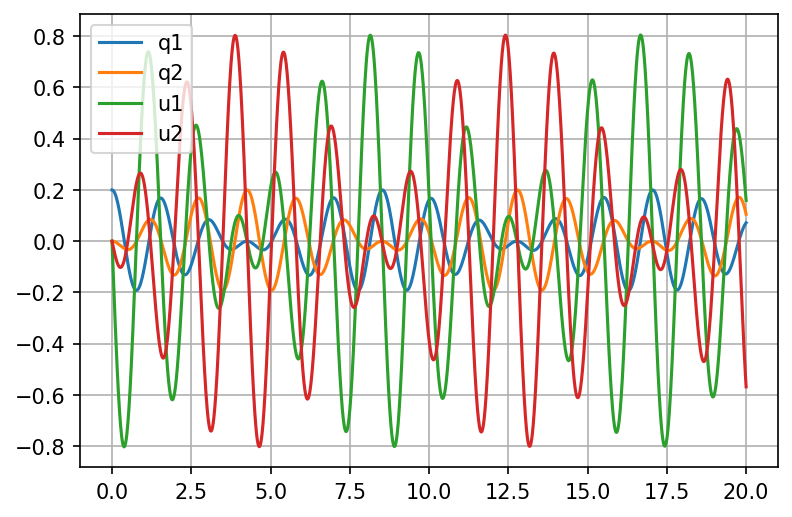

In [36]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150
plt.figure()
plt.plot(sistema.times, Q)
plt.grid(True)
plt.legend(['q1','q2','u1','u2'])


Text(0, 0.5, 'q1')

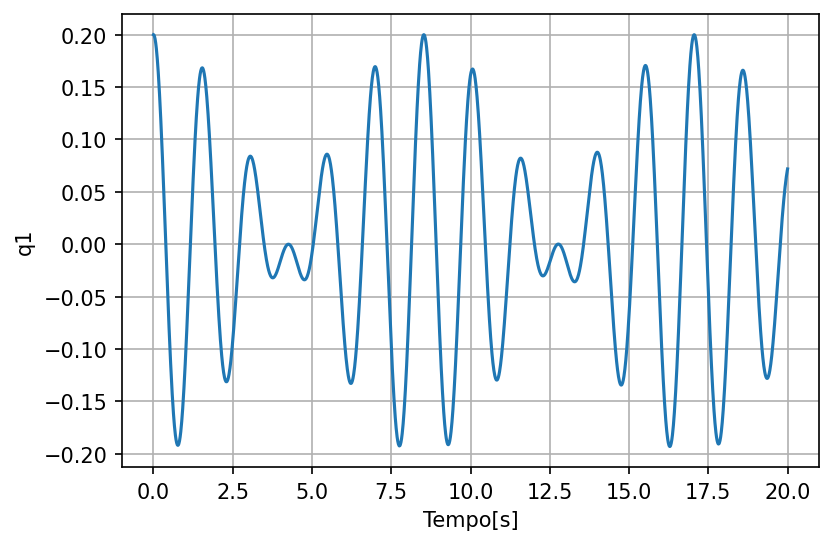

In [37]:
plt.figure()
plt.plot(sistema.times,Q[:,0])
plt.grid(True)
plt.xlabel('Tempo[s]')
plt.ylabel('q1')

Text(0, 0.5, 'q2')

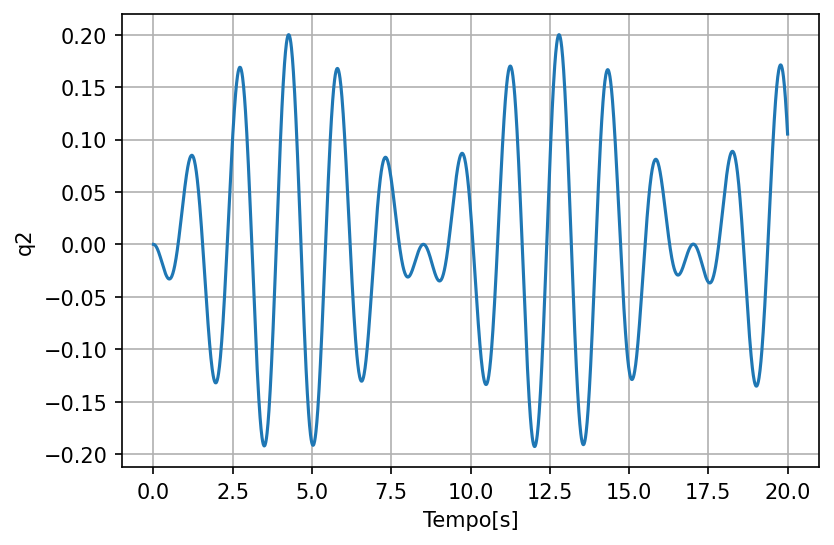

In [38]:
plt.figure()
plt.plot(sistema.times,Q[:,1])
plt.grid(True)
plt.xlabel('Tempo[s]')
plt.ylabel('q2')

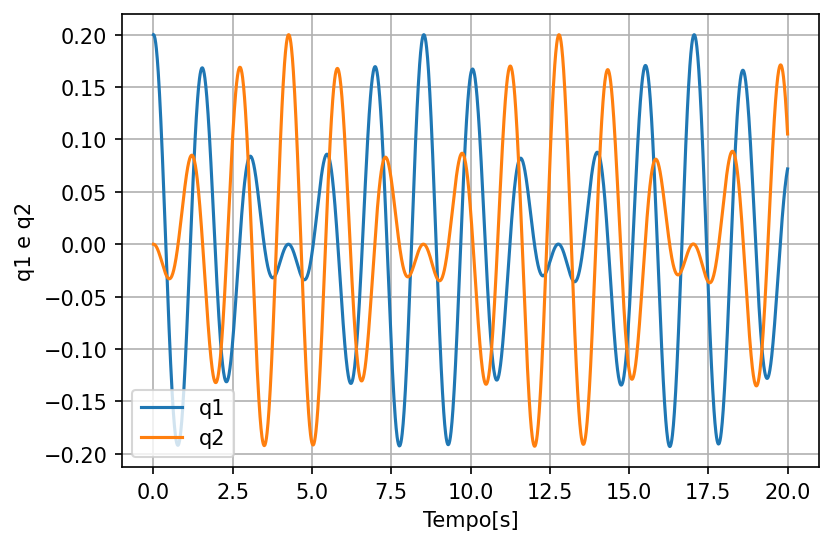

In [39]:
plt.figure()
plt.plot(sistema.times,Q[:,0:2])
plt.grid(True)
plt.xlabel('Tempo[s]')
plt.ylabel('q1 e q2')
plt.legend(['q1','q2'])

Text(0, 0.5, 'u1')

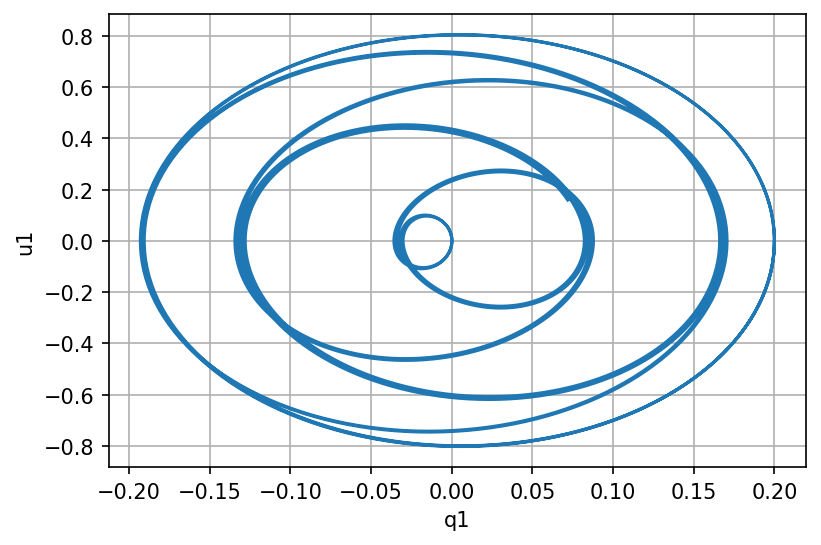

In [40]:
plt.figure()
plt.plot(Q[:,0],Q[:,2])
plt.grid(True)
plt.xlabel('q1')
plt.ylabel('u1')

Text(0, 0.5, 'u2')

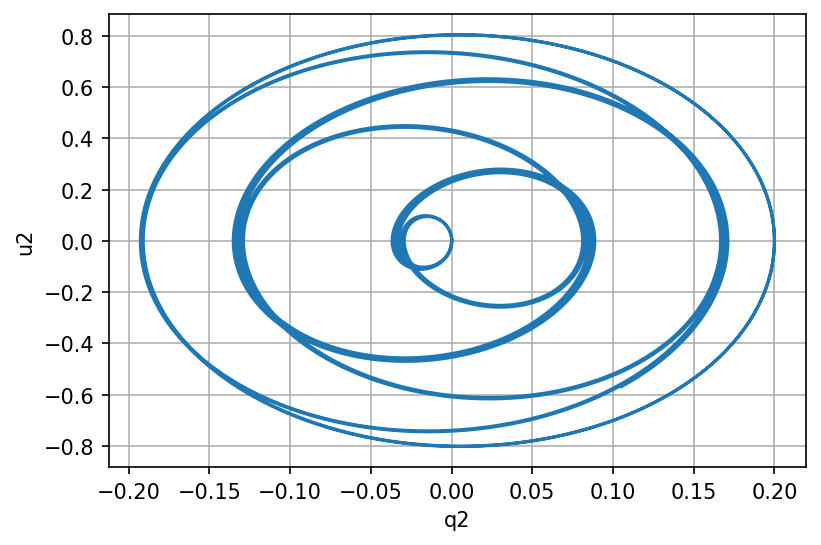

In [41]:
plt.figure()
plt.plot(Q[:,1],Q[:,3])
plt.grid(True)
plt.xlabel('q2')
plt.ylabel('u2')

In [42]:
from matplotlib import animation, rc
from IPython.display import HTML

In [43]:
x0 = 0
y0 = 0
x1 = me.dot(p_P1_O,N.x)
x1 = x1.subs(constantes)
y1 = me.dot(p_P1_O,N.y)
y1 = y1.subs(constantes)
x2 = me.dot(L2*N.x+ p_P2_P1,N.x)
x2 = x2.subs(constantes)
y2 = me.dot(L2*N.x + p_P2_P1,N.y)
y2 = y2.subs(constantes)
ind = 0
qn = {q1:Q[ind,0],q2:Q[ind,1]}

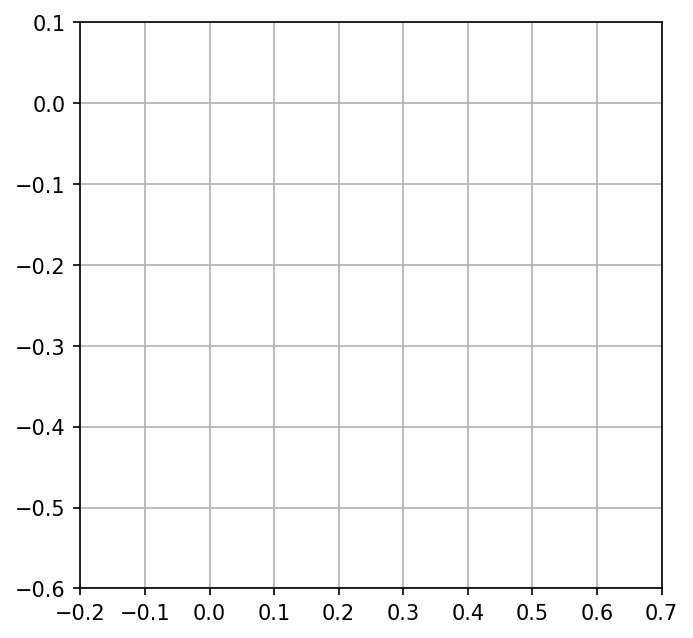

In [44]:
%matplotlib inline
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=150

fig, ax = plt.subplots()

ax.set_xlim(( -0.2, 0.7))
ax.set_ylim((-0.6, 0.1))
ax.grid(True)
line, = ax.plot([], [], 'o-')


In [45]:
def animate(i):
    qn = {q1:Q[i,0],q2:Q[i,1]}
    xp1 = x1.subs(qn)
    xp2 = x2.subs(qn)
    yp1 = y1.subs(qn)
    yp2 = y2.subs(qn)
    line.set_data([x0,xp1,x0,x0+0.5,xp2],[y0,yp1,y0,y0,yp2])
    return (line,)

In [46]:
def init():
    line.set_data([], [])
    return (line,)

In [47]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num, interval=20, blit=True)

In [48]:
HTML(anim.to_html5_video())
#HTML(anim.to_jshtml(fps=fps))